In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('seaborn-whitegrid')

In [2]:
path = '~/Downloads/Rest.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,Tips,Bill Amount
0,10,310
1,220,3200
2,20,350
3,35,710
4,5,80


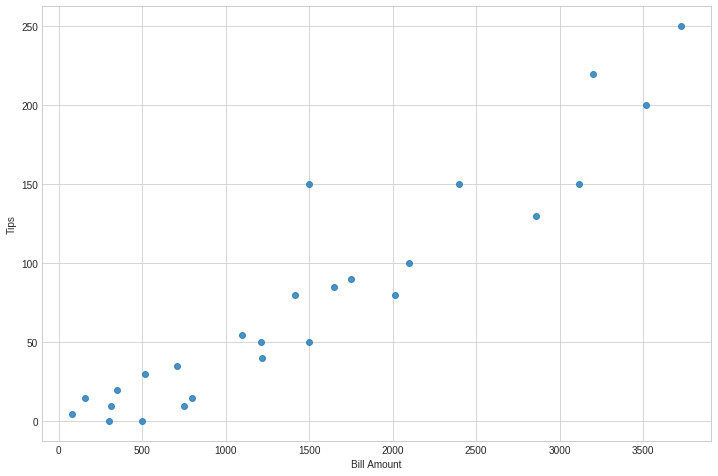

In [4]:
f,ax = plt.subplots(figsize = (12,8))
sns.regplot(x=data['Bill Amount'],y=data['Tips'], fit_reg=False)
plt.show()

In [5]:
# perform Normalization

df = (data - data.mean()) / data.std()
df.head()

,Tips,Bill Amount
0,-0.941219,-1.079739
1,1.978699,1.563930
2,-0.802175,-1.043148
3,-0.593610,-0.713833
4,-1.010741,-1.290134


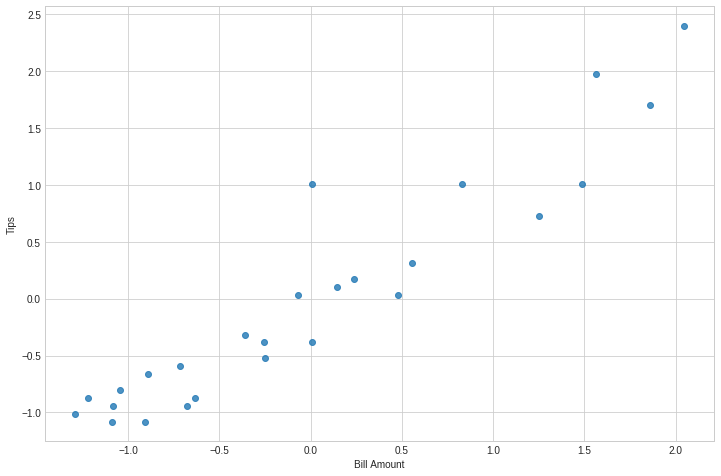

In [6]:
f,ax = plt.subplots(figsize = (12,8))
sns.regplot(x=df['Bill Amount'],y=df['Tips'], fit_reg=False)
plt.show()

In [7]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [8]:
# define alpha and number of iterations

alpha = 0.01
iters = 1000

Now performing the magic:

In [9]:
# add ones column
df.insert(0, 'Ones', 1)


In [10]:
# set X (training data) and y (target variable)
cols = df.shape[1]
X = df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]

In [11]:
X.head()

,Ones,Tips
0,1,-0.941219
1,1,1.978699
2,1,-0.802175
3,1,-0.593610
4,1,-1.010741


In [12]:
y.head()

,Bill Amount
0,-1.079739
1,1.563930
2,-1.043148
3,-0.713833
4,-1.290134


In [13]:
# convert to matrices and initialize theta
X = np.float64(np.matrix(X.values))
y = np.float64(np.matrix(y.values))
theta = np.float64(np.matrix(np.array([0,0])))

In [14]:
X

matrix([[ 1.        , -0.941219  ],
        [ 1.        ,  1.97869903],
        [ 1.        , -0.80217528],
        [ 1.        , -0.59360971],
        [ 1.        , -1.01074086],
        [ 1.        ,  1.00539302],
        [ 1.        , -0.66313157],
        [ 1.        , -0.87169714],
        [ 1.        , -0.38504414],
        [ 1.        ,  0.03208701],
        [ 1.        ,  0.10160887],
        [ 1.        , -0.31552228],
        [ 1.        ,  0.17113073],
        [ 1.        ,  0.31017444],
        [ 1.        ,  0.03208701],
        [ 1.        ,  1.00539302],
        [ 1.        ,  0.72730559],
        [ 1.        ,  2.39583018],
        [ 1.        ,  1.00539302],
        [ 1.        ,  1.7006116 ],
        [ 1.        , -1.08026271],
        [ 1.        , -0.941219  ],
        [ 1.        , -0.87169714],
        [ 1.        , -0.38504414],
        [ 1.        , -0.52408785],
        [ 1.        , -1.08026271]])

In [15]:
y

matrix([[-1.07973858],
        [ 1.56393039],
        [-1.04314801],
        [-0.71383284],
        [-1.29013438],
        [ 0.00883099],
        [-0.89129712],
        [-1.21969753],
        [-0.25645067],
        [-0.06892398],
        [ 0.14604565],
        [-0.35707475],
        [ 0.23752208],
        [ 0.5576896 ],
        [ 0.47993463],
        [ 0.83211891],
        [ 1.25291051],
        [ 2.04418167],
        [ 1.48709018],
        [ 1.85665498],
        [-0.90593335],
        [-0.67724227],
        [-0.63150405],
        [ 0.00883099],
        [-0.25187685],
        [-1.08888622]])

In [16]:
theta

matrix([[0., 0.]])

In [17]:
X.shape,y.shape,theta.shape

((26, 2), (26, 1), (1, 2))

In [18]:
computeCost(X, y, theta)

0.4807692307692309

In [19]:
def gradientDescent(X,y,theta,apha,iters):
    temp = np.matrix(np.zeros((theta).shape))
    parameters = np.int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return cost,theta

In [20]:
# perform linear regression on the data set
cost, t = gradientDescent(X, y, theta, alpha, iters)
t

matrix([[5.55111512e-17, 9.42376339e-01]])

In [21]:
# get the cost (error) of the model
computeCost(X, y, theta)

0.4807692307692309

Text(0.5,1,'Error vs. Training Epoch')

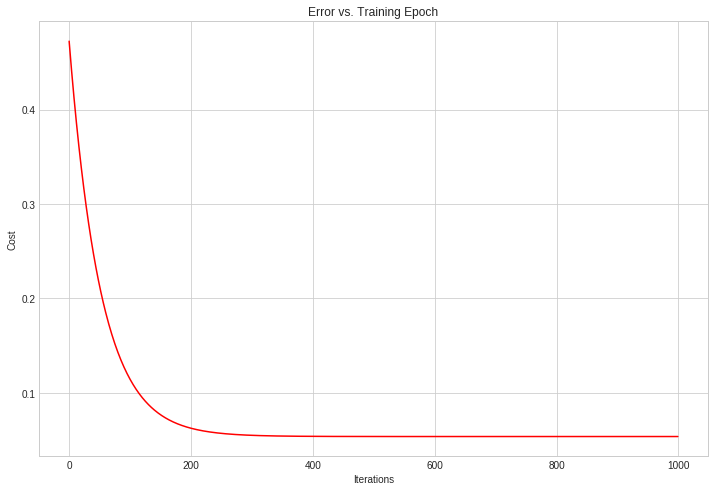

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Text(0.5,1,'Predicted Tips vs. Bill Amount')

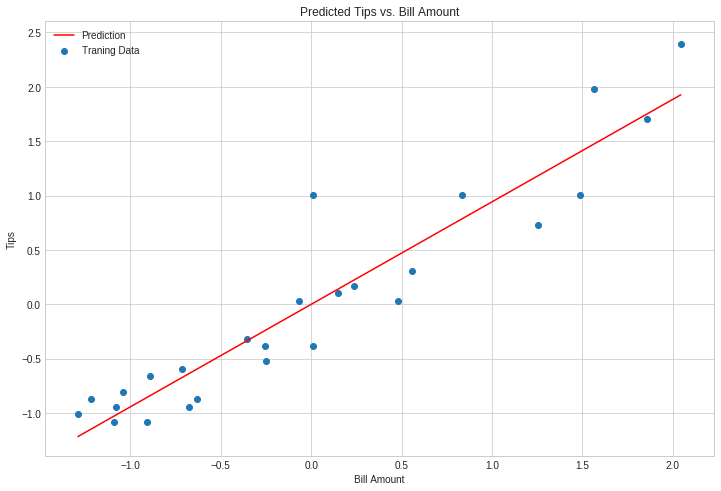

In [23]:
x = np.linspace(df['Bill Amount'].min(), df['Bill Amount'].max(), 100)
f = t[0, 0] + (t[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df['Bill Amount'], df['Tips'], label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Bill Amount')
ax.set_ylabel('Tips')
ax.set_title('Predicted Tips vs. Bill Amount')

In [24]:
data2 = data.insert(1, 'Number of People', [1,4,2,2,1,3,4,1,3,4,5,2,5,7,6,6,8,10,5,6,1,2,3,5,4,1])

In [25]:
data2

In [26]:
# perform Normalization

data2 = (data - data.mean()) / data.std()
data2.head()

# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

iters = 500
# perform linear regression on the data set
cost2, t2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, t2)

0.03446505843244031

Text(0.5,1,'Error vs. Training Epoch')

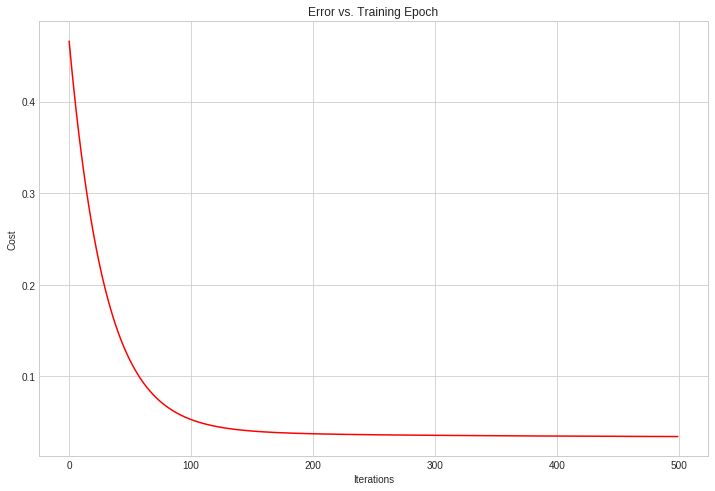

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')